<center><img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png">
<h1>Universidad Sergio Arboleda</h1>
<h3>Ciencias de la Computacion e IA
<h4>Metricas de rendimiento HPC2</h4>
<p>Estudiante: Michael Steven Pinzon Villanueva</p>
<p>Profesor: John Corredor Franco</p>
<p>Noviembre 2022</p>
</center>

# EDA Y MODELO REGRESION LOGISTICA

Se implementa un modelo de regresion logistica al dataframe default of credit card clients, escogido por el estudiante, utilizando la herramienta de python llamada scikit-learn con el fin de validar los datos obtenidos con respecto al  programa desarrollado en C++ utilizando Eigen en clase.

In [2]:
# se importa la libreria pandas
import pandas as pd


In [3]:
# se lee el dataset usando la libreria pandas
df = pd.read_csv('https://raw.githubusercontent.com/irenebenedetto/default-of-credit-card-clients/master/dataset/credit_cards_dataset.csv')


* el dataset cuenta con 25 variables:
* limit_bal es la cantidad de credito otorgado en dolares
* sex es el genero donde 1 es masculino y 2 femenino
* education (1=graduado, 2=universidad, 3=bachillerato, 4=otros, 5=desconocido, 6=desconocido)
* marriage 1=casado, 2=soltero, 3=otros
* edad de la persona
* pay es el estado de pago de cada uno de los meses de un semestre del año 2005
* bill es Importe del estado de cuenta en los meses del semestre del 2005

In [4]:
# se imprime el contenido del dataset
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [5]:
# se imprime la media de cada una de las variables
df.mean()

ID                             15000.500000
LIMIT_BAL                     167484.322667
SEX                                1.603733
EDUCATION                          1.853133
MARRIAGE                           1.551867
AGE                               35.485500
PAY_0                             -0.016700
PAY_2                             -0.133767
PAY_3                             -0.166200
PAY_4                             -0.220667
PAY_5                             -0.266200
PAY_6                             -0.291100
BILL_AMT1                      51223.330900
BILL_AMT2                      49179.075167
BILL_AMT3                      47013.154800
BILL_AMT4                      43262.948967
BILL_AMT5                      40311.400967
BILL_AMT6                      38871.760400
PAY_AMT1                        5663.580500
PAY_AMT2                        5921.163500
PAY_AMT3                        5225.681500
PAY_AMT4                        4826.076867
PAY_AMT5                        

In [6]:
# se halla la desviacion estandar de cada variable
df.std()

ID                              8660.398374
LIMIT_BAL                     129747.661567
SEX                                0.489129
EDUCATION                          0.790349
MARRIAGE                           0.521970
AGE                                9.217904
PAY_0                              1.123802
PAY_2                              1.197186
PAY_3                              1.196868
PAY_4                              1.169139
PAY_5                              1.133187
PAY_6                              1.149988
BILL_AMT1                      73635.860576
BILL_AMT2                      71173.768783
BILL_AMT3                      69349.387427
BILL_AMT4                      64332.856134
BILL_AMT5                      60797.155770
BILL_AMT6                      59554.107537
PAY_AMT1                       16563.280354
PAY_AMT2                       23040.870402
PAY_AMT3                       17606.961470
PAY_AMT4                       15666.159744
PAY_AMT5                       1

In [7]:
# se imprime la informacion general del dataset de cada una de las columnas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [8]:
#se listan los valores nulos
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
df.shape

(30000, 25)

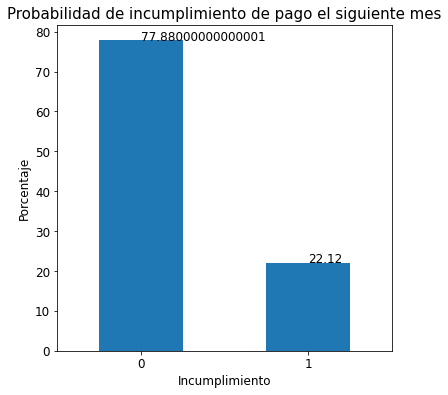

In [10]:
#se grafica la probabilidad de incumplimiento donde 0 es que el cliente si va a pagar su credito y 1 es que no paga

import matplotlib.pyplot as plt

def_cnt = (df['default.payment.next.month'].value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.xlabel('Incumplimiento', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.title("Probabilidad de incumplimiento de pago el siguiente mes", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)

plt.show()

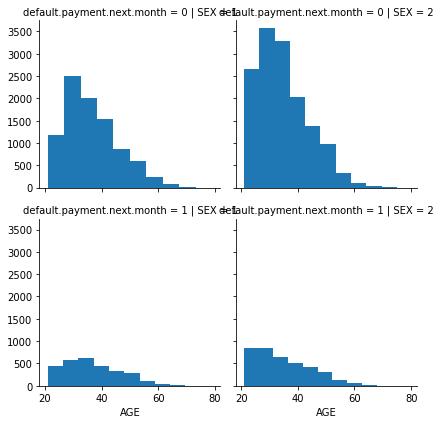

In [11]:
# se realiza la grafica de acuerdo a la cantidad de cumplimiento y no cumplimiento de cada genero 
import seaborn as sns
g = sns.FacetGrid(df, row='default.payment.next.month', col='SEX')
g = g.map(plt.hist, 'AGE')

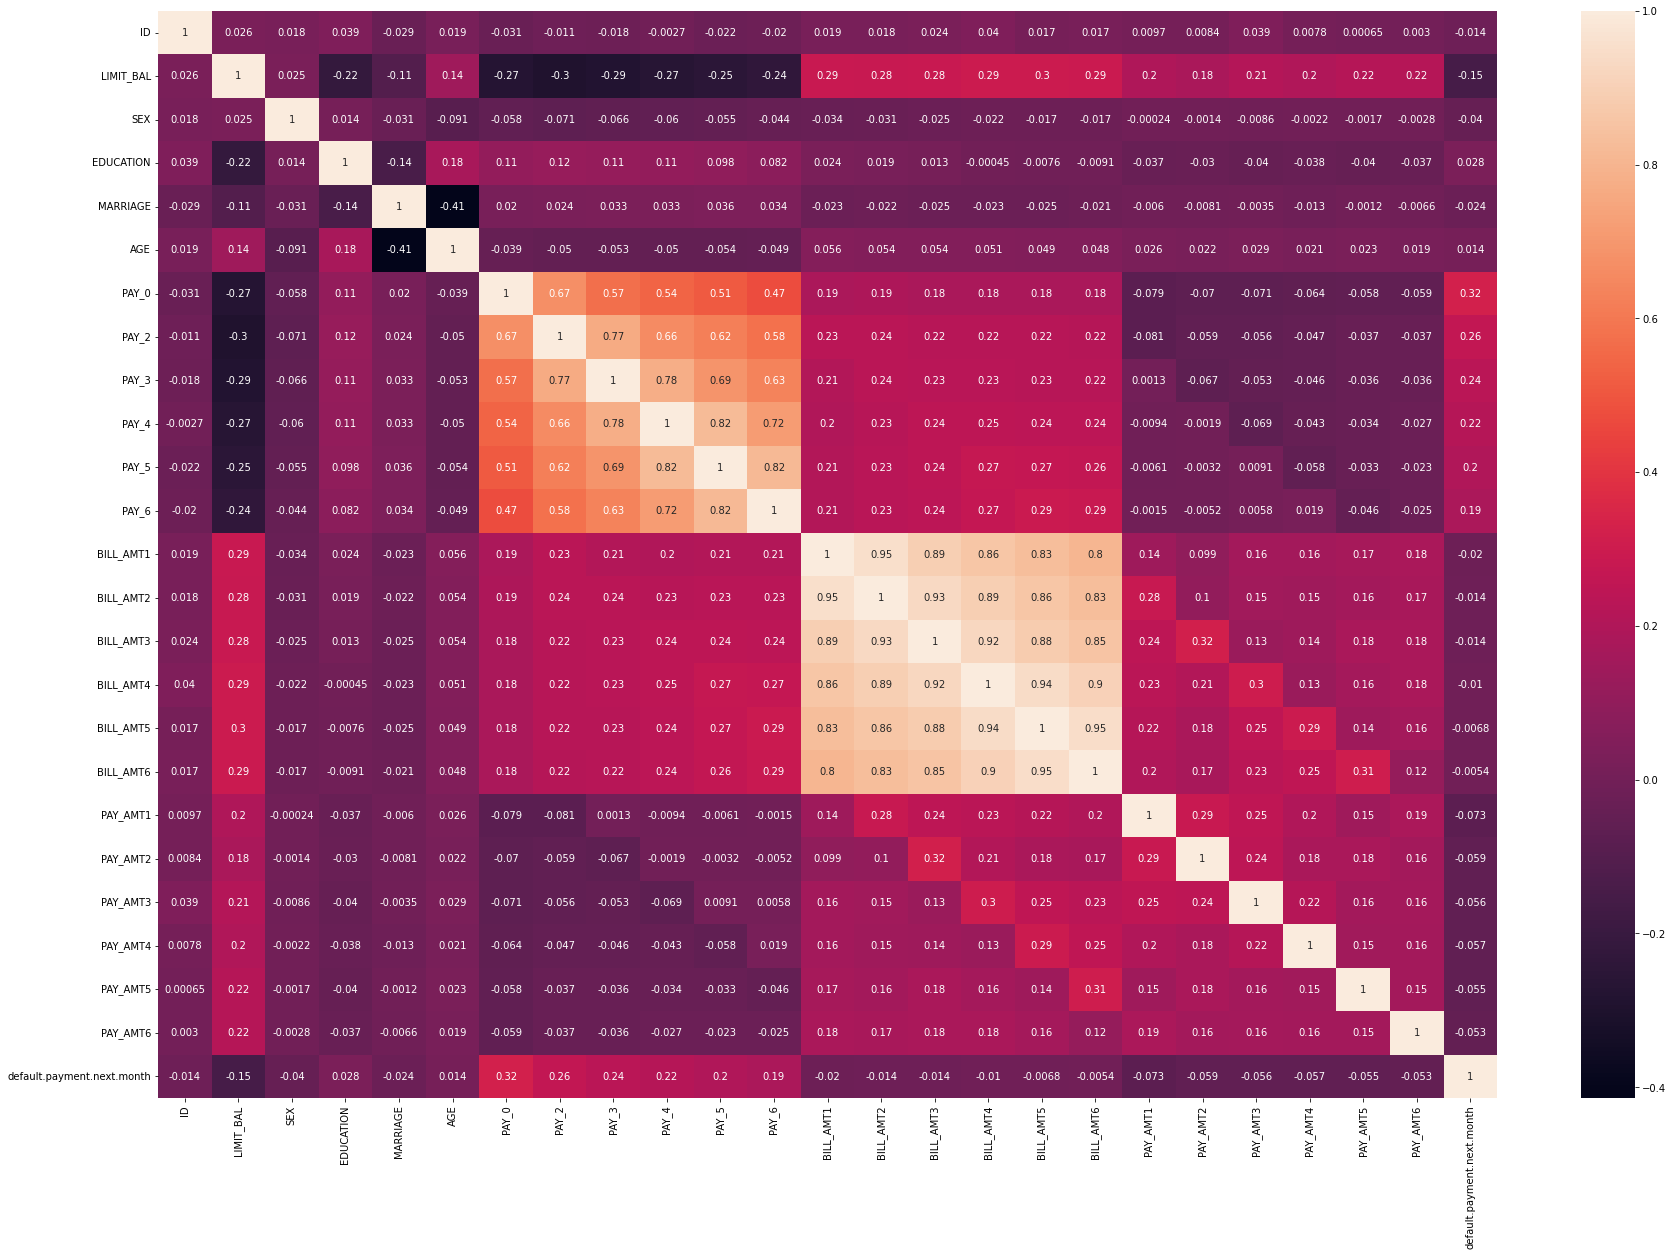

In [12]:
# se realiza la matriz de correlacion de todo el dataset

plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

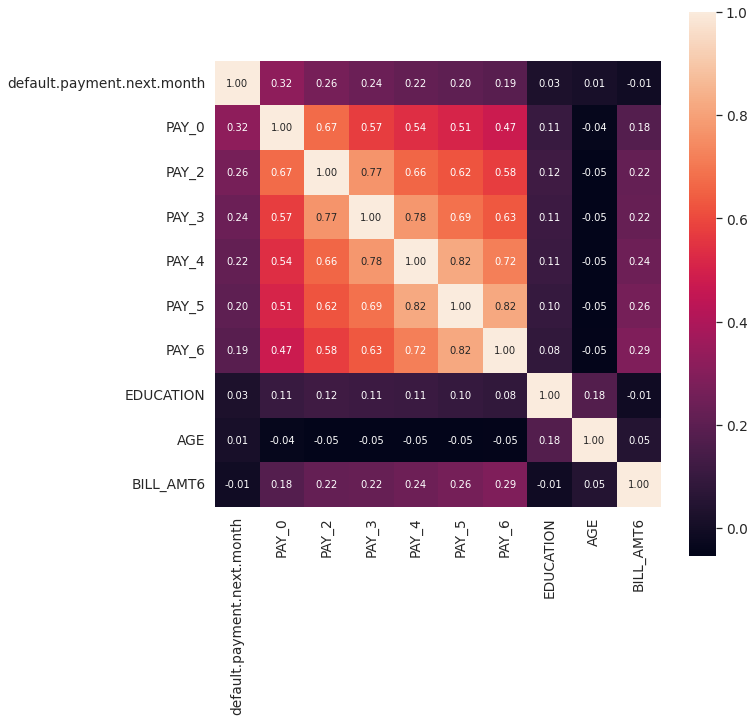

In [13]:
import numpy as np

# se realiza la matriz de correlacion con las variables importantes para la prediccion del modelo
k = 10 
corrmat = df.corr()
cols = corrmat.nlargest(k, 'default.payment.next.month')['default.payment.next.month'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(10,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [14]:
# primera manera de escalar los datos con standardScaler

# importar standard scaler
from sklearn.preprocessing import StandardScaler
# se normaliza todos los datos del dataframe df
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [15]:
df1

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,-1.731993,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378
1,-1.731878,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378
2,-1.731762,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942
3,-1.731647,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942
4,-1.731531,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.014861,0.111736,0.138865,0.188746,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.532942
29996,1.731647,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.532942
29997,1.731762,-1.059646,-1.234323,0.185828,0.858557,0.164303,3.574267,2.617654,1.809921,-0.666599,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1.876378
29998,1.731878,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.904712,-0.723570,0.138865,0.188746,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1.876378


In [16]:
# segunda manera de escalar los datos con MinMaxScaler

# se importa de sklearn la libreria MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# se normaliza todos los datos del dataframe df
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [17]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0.000000,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.000033,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.000067,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.000100,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.000133,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.999867,0.212121,0.0,0.500000,0.333333,0.310345,0.2,0.2,0.2,0.2,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29996,0.999900,0.141414,0.0,0.500000,0.666667,0.379310,0.1,0.1,0.1,0.1,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29997,0.999933,0.020202,0.0,0.333333,0.666667,0.275862,0.6,0.5,0.4,0.1,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29998,0.999967,0.070707,0.0,0.500000,0.333333,0.344828,0.3,0.1,0.2,0.2,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


In [18]:
# se importa de sklearn la libreria train_test_split
from sklearn.model_selection import train_test_split
# se separa el dataframe df en 2 partes, una para entrenamiento y otra para pruebas
X_train, X_test, y_train, y_test = train_test_split(df.drop('default.payment.next.month', axis=1), df['default.payment.next.month'], test_size=0.2, random_state=42)

In [19]:
# se imprime la variable X_train
X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,0.725124,0.070707,1.0,0.333333,0.666667,0.051724,0.2,0.2,0.2,0.2,...,0.129346,0.229591,0.119957,0.291301,0.004010,0.002969,0.002335,0.001961,0.003388,0.001661
251,0.008367,0.020202,0.0,0.333333,0.666667,0.120690,0.2,0.2,0.2,0.2,...,0.102352,0.183928,0.102464,0.260979,0.005731,0.000739,0.000950,0.001538,0.000000,0.000000
22941,0.764725,0.171717,1.0,0.833333,0.333333,0.396552,0.2,0.2,0.1,0.1,...,0.086811,0.160138,0.087471,0.268925,0.000000,0.000505,0.000000,0.011081,0.024242,0.000344
618,0.020601,0.050505,0.0,0.166667,0.666667,0.068966,0.2,0.2,0.2,0.2,...,0.107501,0.197477,0.119933,0.291057,0.002310,0.001128,0.002232,0.002415,0.004455,0.003783
17090,0.569686,0.121212,1.0,0.333333,0.666667,0.068966,0.2,0.2,0.2,0.2,...,0.149338,0.271125,0.200483,0.356197,0.004693,0.002494,0.005580,0.008052,0.011723,0.020240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.993433,0.040404,0.0,0.333333,0.666667,0.189655,0.2,0.2,0.2,0.2,...,0.116948,0.212849,0.109640,0.265681,0.002290,0.001781,0.001776,0.000116,0.002659,0.138880
5390,0.179673,0.191919,0.0,0.166667,0.666667,0.275862,0.4,0.4,0.4,0.4,...,0.178796,0.314795,0.248252,0.393222,0.015454,0.003562,0.000000,0.012077,0.014067,0.007566
860,0.028668,0.040404,0.0,0.166667,0.666667,0.086207,0.0,0.0,0.0,0.0,...,0.086345,0.160138,0.080648,0.260979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15795,0.526518,0.060606,1.0,0.333333,0.666667,0.068966,0.2,0.2,0.2,0.2,...,0.114429,0.193222,0.109040,0.282526,0.003434,0.001187,0.005022,0.001932,0.000000,0.002270


In [20]:
# se imprime la variable y_train
y_train


21753    0.0
251      0.0
22941    0.0
618      0.0
17090    0.0
        ... 
29802    0.0
5390     1.0
860      0.0
15795    1.0
23654    1.0
Name: default.payment.next.month, Length: 24000, dtype: float64

In [21]:
# se importa de sklearn la libreria LogisticRegression
from sklearn.linear_model import LogisticRegression
# se crea el modelo de regresion logistica
modelo = LogisticRegression()

In [22]:
# se crean las variables de prediccion y de prueba
y_pred_test = modelo.fit(X_train, y_train).predict(X_test)
y_pred_train = modelo.fit(X_train, y_train).predict(X_train)


/home/michael/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/michael/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [23]:
# se importa de sklearn la libreria accuracy_score
from sklearn.metrics import accuracy_score
# se calcula la precision del modelo
print('Precision del modelo en entrenamiento: ', accuracy_score(y_train, y_pred_train))
print('Precision del modelo en pruebas: ', accuracy_score(y_test, y_pred_test))


Precision del modelo en entrenamiento:  0.8095416666666667
Precision del modelo en pruebas:  0.81


# COMPARATIVA DE RESULTADOS CON C++ 

* se toma captura de los resultados del promedio de los datos de cada columna realizado en c++

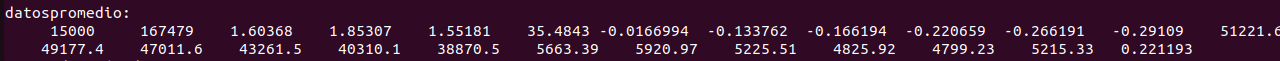

* Se toma captura de los datos obtenidos en c++ de la desviacion estandar

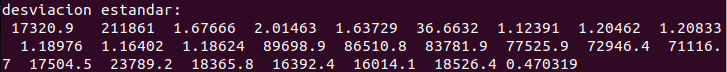

* Se toma captura de los resultados con los datos normalizados realizados en c++

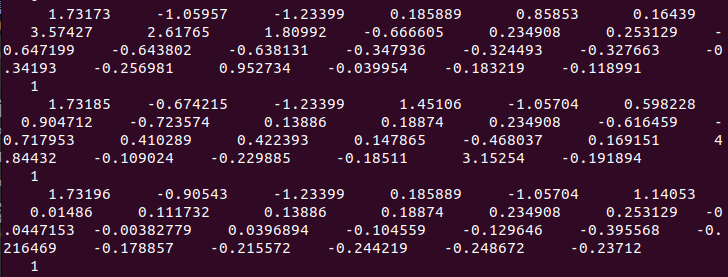

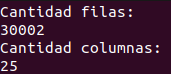

* Se obtiene el acuraccy de entrenamiento y prueba realizado en c++

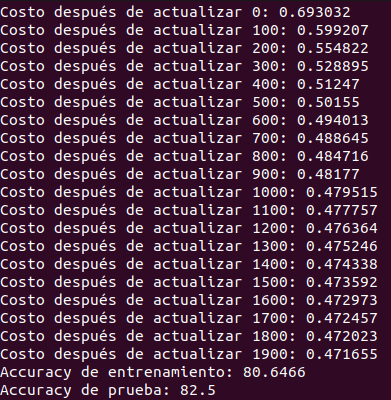

# Analisis

* De acuerdo a las graficas presentandas anteriormente se puede ver que el conjunto de datos consta de un 77 % de clientes que no se espera que dejen de pagar, mientras que se espera que un 23 % de clientes dejen de pagar.
* De acuerdo a las graficas presentadas anteriormente se observa que las mujeres del grupo de edad 20-30 tienen una tendencia muy alta a la falta de pago en comparación con los hombres , ademas tambien tienen mayor tendencia que si paguen el credito en comparacion con los hombres
* Se realiza la matriz de correlacion seleccionando las variables que nos ayuda a predecir el incumplimiento del proximo mes y para ello se dejan la variables de  estado de pago de los ultimos meses. hay multicolinealidad entre las características del estado de pago.
* El accuracy de entrenamiento es aproximadamente de 80 porciento y de prueba del 82% por lo tanto el modelo es bueno a la hora de predicir si el cliente va a pagar o no el otro mes el valor del credito.  

# Conclusiones


* La regresion logistica es un algoritmode aprendizaje supervisado que se utiliza para predecir la probabilidad de un evento en particular utilizado para la clasificacion binaria
* Se puede concluir que el lenguaje c++ es mas rapido que python en el procesamiento y entrenamiento de los datos al ser un lenguaje compilado
* Se comprueba que los resultados obtenidos en ambos lenguajes (python usando scikit learn y c++ ) son los mismos tanto en el promedio de los datos, los datos normalizados y los accuracy del entrenamiento y prueba
* los datos del accuracy de entrenamiento y prueba son muy parecidos en ambos lenguajes de programacion sin embargo no son exactamente iguales ya que se toman valores aleatorios para el entrenamiento y prueba de los datsos

# Referencias

* https://drive.google.com/file/d/12Yw_a4k7IgjZUFsEcYTZCgXmMJwraa9z/view
* https://scikit-learn.org/stable/
* https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html